# Introduction to Simple Linear Regression

### Introduction

In the last couple lessons, we saw a whirlwind tour of linear regression.  We saw that by passing through data to our linear regression model, we were able to make predictions.   Moreover we were able to use the model to detect a general pattern between our features and our target.  

Now there's a lot of information that we have to fill in as to how our linear regression model works.  But in this lesson, we'll work on understanding the *results* that we get from our machine learning model.

### Back to Our Problem

Let's return to our problem of predicting T-shirt sales for based on different advertising budgets.

|ad spending        | t-shirts           
| ------------- |:-------------:| 
|    800        | 330  | 
|    1500        |780 | 
|    2000      | 1130 | 
|    3500      | 1310 | 
|    4000      | 1780 | 

And let's once again use this data to make predictions.

In [1]:
import numpy as np
ad_spends = np.array([800, 1500, 2000, 3500, 4000])
sales = np.array([330, 780, 1130, 1310, 1780])

In [2]:
# We need to shape into a separate row for each observation
X = ad_spends.reshape(5, -1)

X

array([[ 800],
       [1500],
       [2000],
       [3500],
       [4000]])

In [5]:
from sklearn.linear_model import LinearRegression
# create the initial model
regression = LinearRegression()

# pass training data from the model
regression.fit(X, sales)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now after we pass our data into this model, the key information that we learn is our coefficient and our intercept.

In [6]:
regression.coef_

array([0.38675261])

In [7]:
regression.intercept_

153.26385079539216

Let's learn why these numbers are so important.

### The simple linear regression model

These numbers tell us that our model predicts the following:

$$tshirt\_sales = .38*ad\_spend + 153.26$$.  

> That is, if we plug in an amount of advertising, we multiply that amount by .38 and add 153.26 to get the predicted amount of T-shirt sales.

In [10]:
regression.coef_

array([0.38675261])

In [11]:
regression.intercept_

153.26385079539216

How do we know this?  Well, when sklearn is returning us numbers to plug into a simple the linear regression formula, which is the following:

$$y = mx + b$$

And the `coef_` and `intercept_` numbers plug directly into this formula.

$$tshirt\_sales = .38*ad\_spend + 153.26$$.  

So we can see that, in this example: 

* $y$ corresponds to `tshirt_sales`
* $x$ corresponds `ad_spend`, and 
* $m$ is .38
* $b$ is 153.26

Now let's better understand the $y$, $m$ and $x$ components of simple linear regression, as these are the most important parts.  We'll discuss the $b$ component later.

### Dependent and Independent Variables

The way to understand $y = mx$ is to think of $x$ as the input and $y$ as the output.  So in our T-shirt example, we input advertising dollars spent, and the output is the T-shirt sales.  

> The output is what we are trying to predict.

In linear regression, $y$, our output, is often called our **dependent variable** as the output changes *depending* on a the input.  Here our dependent variable is T-shirt sales, as it *depends* on different spending of advertising.  And yes, we have also described this as our target.

In linear regression $x$ is called the **independent variable**, as it does not depend on anything.  We can plug in any value for $x$ to get an output of $y$.  In our example, advertising spending is our independent variable.  And we have previously described this as our feature.

### Understanding the coefficient

Now let's take a look at that `m` in $y = mx + b$.  In our T-shirt sales formula, $m = .38$.  The $m$ is called a coefficient.  In math, a coefficient just means a number that is multiplied by a variable -- here $m$ is multiplied by our independent variable $x$.  So whatever the value of $x$, we multiply it by our coefficient $m$.

When we plot the predictions of our linear regression model as a line, our coefficient determines the slope of the line.  The larger the coefficient, the steeper our line.  Let's see this below where we plot the two linear models:

$$tshirt\_sales = .38*ad\_spend$$  

and

$$tshirt\_sales = .78*ad\_spend$$  

In [19]:
import numpy as np
import plotly.graph_objects as go
input_vals = np.array([800, 1500, 2000, 3500, 4000])
outcomes = np.array([330, 780, 1130, 1310, 1780])
prediction_vals_1 = .38*input_vals
prediction_vals_2 = .78*input_vals
prediction_trace_1 = go.Scatter(x = input_vals, 
                              y = prediction_vals_1, 
                              mode = 'lines', name = '.38*ad_spend')

prediction_trace_2 = go.Scatter(x = input_vals, 
                              y = prediction_vals_2, 
                              mode = 'lines', name = '.78*ad_spend')
observed_trace = go.Scatter(x = input_vals, 
                              y = outcomes, 
                              mode = 'markers', name = 'observed')

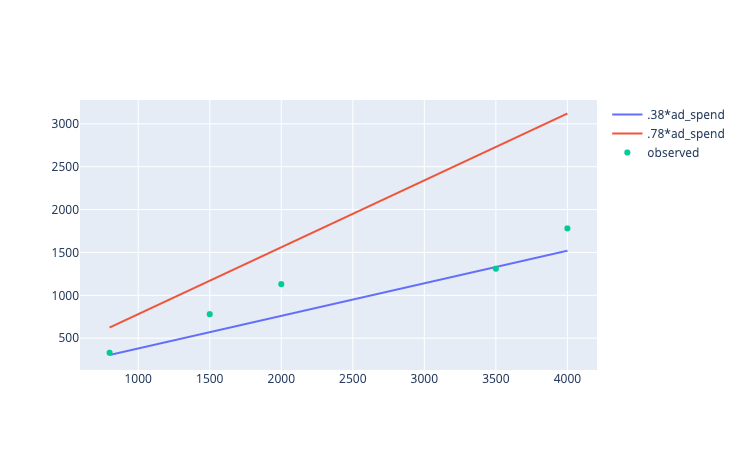

In [20]:
go.Figure(data = [prediction_trace_1, prediction_trace_2, observed_trace])

> So we can see that the larger the value of $m$, the steeper the line.

If we think about it, it makes sense that the coefficient determines the steepness of our line.  After all, if we look at our formulas of $tshirt\_sales = .38*ad\_spend$, and $tshirt\_sales = .78*ad\_spend$, and we plug in ad spends of of 1000, and 1100, we predict the following:


| sample inputs        | model 1 prediction | model 2 prediction           
| ------------- |:-------------:| :-------------:| 
|    100        | $100*.38 =  38$ |  $ 100*.78 = 78 $|
|    110       | $110*.38 =  41.8$ | $110*.78 = 85.8$ |

* So in the first model, for a 10 unit increase in x, the predicted y increases by 38.  
* And in the second model, for a 10 increase in x, the predicted y increases by 78.  

So the larger our coefficient, the larger y our model predicts, for a given value of x.  And accordingly the steeper the slope.

Also take note of what this coefficient is saying about the real world.  The larger our coefficient in a model, the more impact our independent variable has.  So here model 2, as opposed to model 1, is saying that advertising has more of an impact as model two predicts that each extra dollar spent on advertising will increase expected sales by .78, while the first predicts an impact of .38.

### Understanding the Y intercept

There's one more component to our line.  This is that value $b$ in our formula 

$$y = mx + b$$

That $b$ value is called the y intercept.  The y intercept is simply the y-value when our independent variable, x is zero.  So here, it's the expected sales when our ad spend is 0.  Let's examine this further.

In our t shirts example, let's say we have the following prediction model.

$$tshirt\_sales = .38*ad\_spend + 100$$.  

So now when ad_spend is 0, then $tshirt\_sales = .38*0 +100 = 100$.

Notice that this also affects every other prediction.  Every previous prediction our model made also increase by 100.  So when we spend 100 on advertising, we now predict sales of 138 instead of 38.  And when we spend 110, we predict sales of 438 instead of 338.  

Now let's plot the models $tshirt\_sales =.38∗ad\_spend$ and $tshirt\_sales =.38∗ad\_spend + 100 $ side by side.

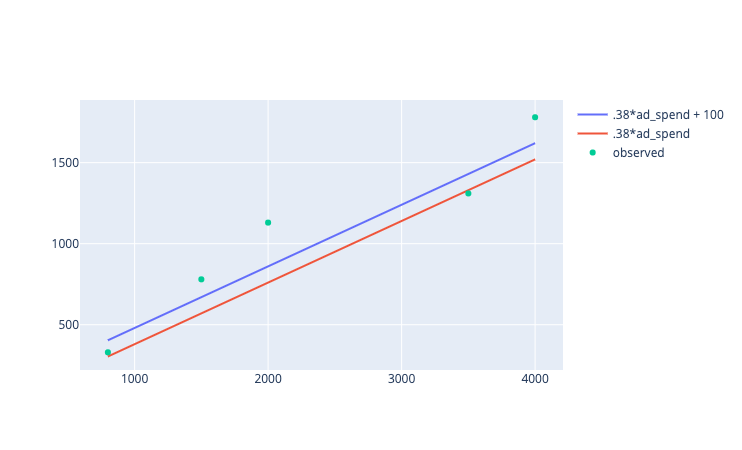

In [22]:
import numpy as np
import plotly.graph_objects as go

input_vals = np.array([800, 1500, 2000, 3500, 4000])
outcomes = np.array([330, 780, 1130, 1310, 1780])
prediction_vals_1 = .38*input_vals
prediction_vals_2 = .38*input_vals + 100

prediction_trace_1 = go.Scatter(x = input_vals, 
                              y = prediction_vals_2, 
                              mode = 'lines', name = '.38*ad_spend + 100')
prediction_trace_2 = go.Scatter(x = input_vals, 
                              y = prediction_vals_1, 
                              mode = 'lines', name = '.38*ad_spend')

observed_trace = go.Scatter(x = input_vals, 
                              y = outcomes, 
                              mode = 'markers', name = 'observed')

go.Figure(data = [prediction_trace_1, prediction_trace_2, observed_trace])

So notice that this matches what we said above.  We said that including the value of $b$ increases our predicted output of T-shirts by the same amount, that value of $b$, 100.  And that's what we see.

This is different from changing our slope $m$, which changes the steepness of the line.  

Try changing the slopes and intercepts in the code above, to see how the line changes, or feel free to add in another line with different slopes and intercepts.

### Summary

In this lesson, we learned about a simple linear regression model.  A simple linear model has one input and one output.  The input is called the independent variable, $x$.  In our example above, T-shirt sales is the dependent variable and ad spending is the independent variable.  

We also discussed our coefficient, which is the number we multiply our independent variable by.  It is represented by $m$ in the fromula $y = mx + b$.  We can interpret our coefficient as the impact that our independent variable $x$ has on our dependent variable $y$.  So in the model $ tshirt\_sales = .38*ad\_spending$, this means our model predicts that a one dollar increase in spending increases the number of sales by .38.  The value of $m$ also determines the slope of our line -- the large the absolute value of $m$, the steeper the slope.

Finally we saw another component of our line, the intercept.  The intercept is the predicted output when our independent variable is zero.  So in our model of $ tshirt\_sales = .38*ad\_spending + 153.26 $ we say that even when the ad spending is zero, we expect sales of 153.  We also noticed that the intercept increases our predicted output by that value (here 153), for every input value.  So where we previously to predicted an output of 38 with spending of 100 dollars, the updated formula predicts 38 + 153 = 188.  